# Authentication

In [ ]:
API_KEY = ''
SECRET_KEY = ''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from binance.client import Client
import math

In [ ]:
client = Client(API_KEY, SECRET_KEY)

# Historical Data

In [ ]:
#get kline data
klines = client.get_historical_klines("LINKUSDT", Client.KLINE_INTERVAL_30MINUTE, "1 Jan, 2021", "30 May, 2023")

#put in dataframe
kline_df = pd.DataFrame(klines)
#rename columns
kline_df.columns = ['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore']


#drop null value after shifting and drop unnecessary columns
kline_df.dropna(inplace=True)
kline_df.drop(['Ignore','Open time','Close time','Open','High','Low'], inplace=True, axis=1)

#convert kline data to integer/float datatype
numeric_columns = ['Close','Volume','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume']
kline_df[numeric_columns] = kline_df[numeric_columns].apply(pd.to_numeric,axis=1)

# Technical Analysis (Buying signals)

In [ ]:
median = kline_df['Volume'].median()
median = int(median)
median = str(median)
print(median)
print(len(median))
pump = 0.1 * len(median)
print(pump)

99442
5
0.5


In [ ]:
mark = kline_df.loc[(kline_df['Volume'] - kline_df['Volume'].shift(300) > kline_df['Volume']* 0.9) & #0.95
                    (kline_df['Number of trades'] - kline_df['Number of trades'].shift(300) > kline_df['Number of trades']* 0.8) &
                   (kline_df['Close'] - kline_df['Close'].shift(2000) < -kline_df['Close']* pump) &
                   (kline_df['Close']/kline_df['Close'].shift(50) < 0.9)]
                                #0.8 close ratio and 0.8*volume
                                #0.9 close ratio and 0.9*volume (0.95 for 30min) for 5min intervals
mark.index

Int64Index([ 6830,  9588,  9589, 16155, 16156, 16157, 16158, 16159, 16166,
            16171, 19991, 20111, 20112, 20118, 23688, 23743, 23754, 23755,
            23756, 23757, 23784, 23785, 23787, 23788, 23789, 23791, 23792,
            23793, 23795, 25215, 25238, 25239, 25241, 25247, 25252, 25313,
            25315, 25316, 25319, 25337, 25338, 25340, 25344, 25345, 25346,
            25566],
           dtype='int64')

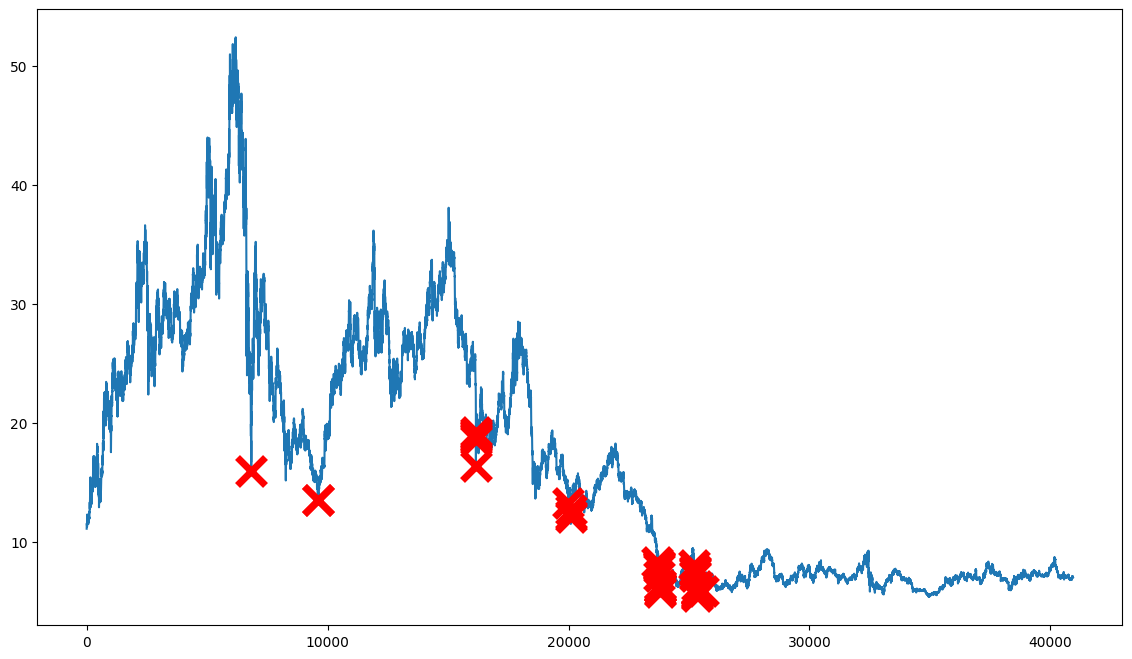

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(kline_df['Close'], markevery=mark.index, marker = 'x', markersize  = 20,  markeredgecolor = 'red', markeredgewidth = 5, label='points')

# Technical Analysis (Sell signals)

In [ ]:
mark = kline_df.loc[(kline_df['Volume'] - kline_df['Volume'].shift(300) > kline_df['Volume']*0.8) & #0.8 also works
                        (kline_df['Close'] - kline_df['Close'].shift(1000) > kline_df['Close']* 0.25) & #multiplier based on no. of trades
                    #(kline_df['Close'] - kline_df['Close'].shift(2000) > kline_df['Close']* 0.3) &
                    (kline_df['Taker buy base asset volume'] - kline_df['Taker buy base asset volume'].shift(1000) > kline_df['Taker buy base asset volume']* 0.9) &
                    (kline_df['Number of trades'] - kline_df['Number of trades'].shift(300) > kline_df['Number of trades']* 0.85)]  #shift(500)

mark.index

Int64Index([ 5002,  5934, 15020, 15021, 17683, 17804, 17808, 17809, 17810,
            17878, 17882, 17906, 17950],
           dtype='int64')

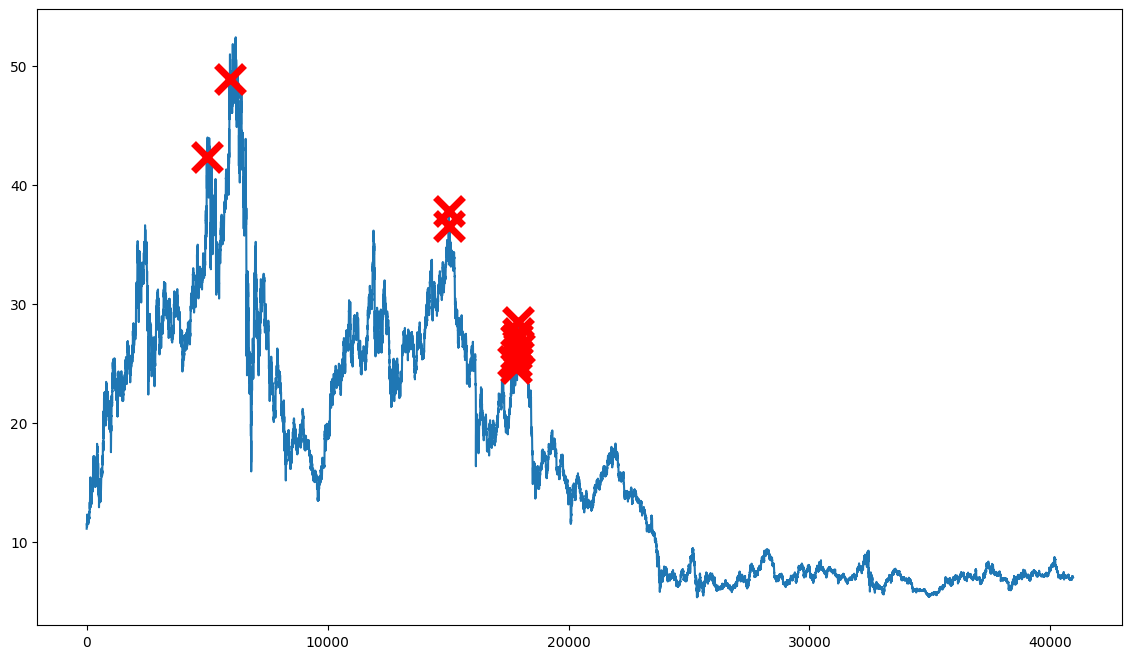

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(kline_df['Close'], markevery=mark.index, marker = 'x', markersize  = 20,  markeredgecolor = 'red', markeredgewidth = 5, label='points')